# Task 3 - Experience Analytics

In this notebook, we want to evaluate the user experience of the customer

In [1]:
# Importation of the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df = pd.read_csv("../data/Cleaned_Data.csv",na_values=['undefined',None])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (s)                                  150001 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [3]:
df.groupby('MSISDN/Number')['MSISDN/Number'].count()

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: MSISDN/Number, Length: 106856, dtype: int64

In [4]:
dfTask3 = df[['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
           'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
           'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
            'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',            
           'Handset Type']]
dfTask3[['MSISDN/Number']] = dfTask3[['MSISDN/Number']].astype(str).replace('nan',np.nan)
dfTask3.head(5)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Handset Type
0,33664962239.0,42.0,5.0,23.0,44.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A5 Sm-A520F
1,33681854413.0,65.0,5.0,16.0,26.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy J5 (Sm-J530)
2,33760627129.0,45.0,5.0,6.0,9.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A8 (2018)
3,33750343200.0,45.0,5.0,44.0,44.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN
4,33699795932.0,45.0,5.0,6.0,9.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Sm-G390F


In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [6]:
# Check for missing values
missing_values_table(dfTask3)

Your selected dataframe has 16 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Handset Type,9559,6.4,object
MSISDN/Number,1066,0.7,object


In [7]:
# Fill NA of handset type with the mode
dfTask3['Handset Type'] = dfTask3['Handset Type'].fillna(dfTask3['Handset Type'].mode()[0])

In [8]:
missing_values_table(dfTask3)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
MSISDN/Number,1066,0.7,object


In [9]:
dfTask3["Total TCP"]=dfTask3['TCP DL Retrans. Vol (Bytes)']+ dfTask3['TCP UL Retrans. Vol (Bytes)']+dfTask3['TCP DL Retrans. Vol (Bytes)']+ dfTask3['TCP UL Retrans. Vol (Bytes)']
dfTask3["Total RTT"]=dfTask3['Avg RTT DL (ms)']+dfTask3['Avg RTT UL (ms)']
dfTask3["Total Throughput"]=dfTask3['DL TP < 50 Kbps (%)']+dfTask3['50 Kbps < DL TP < 250 Kbps (%)']+dfTask3['250 Kbps < DL TP < 1 Mbps (%)']+dfTask3['DL TP > 1 Mbps (%)']+dfTask3['UL TP < 10 Kbps (%)']+dfTask3['10 Kbps < UL TP < 50 Kbps (%)']+dfTask3['50 Kbps < UL TP < 300 Kbps (%)']+dfTask3['UL TP > 300 Kbps (%)']

In [10]:
dfExp = dfTask3.groupby('MSISDN/Number').agg({'Total TCP': 'mean',
                                              'Total RTT': 'mean',
                                              'Total Throughput': 'mean',
                                              'Handset Type': pd.Series.mode})

In [11]:
dfExp.rename(columns={'Total TCP':'Avg TCP','Total RTT':'Avg RTT','Total Throughput':'Avg Throughput'},inplace=True)
dfExp.columns

Index(['Avg TCP', 'Avg RTT', 'Avg Throughput', 'Handset Type'], dtype='object')

## **Task 3.2**

### a.	TCP values in the dataset

In [12]:
def compute_bound(df,column,ntop,ascending=False):
    valReturn = df[column].sort_values(ascending=ascending)
    return valReturn.head(ntop)

def compute_frequent(df,column,ntop):
    valReturn = df[column].value_counts()
    return valReturn.head(ntop)

In [13]:
# Top 10 AVG TCP
compute_bound(dfExp,'Avg TCP',10)

MSISDN/Number
3197020876596.0    1179359.0
33669138880.0      1179359.0
33669158963.0      1179359.0
33669158559.0      1179359.0
33669158353.0      1179359.0
33669157841.0      1179359.0
33669156988.0      1179359.0
33669156909.0      1179359.0
33669156713.0      1179359.0
33669156488.0      1179359.0
Name: Avg TCP, dtype: float64

In [14]:
# Bottom 10 AVG TCP
compute_bound(dfExp,'Avg TCP',10,ascending=True)

MSISDN/Number
3197020876596.0    1179359.0
33669158559.0      1179359.0
33669158353.0      1179359.0
33669157841.0      1179359.0
33669156988.0      1179359.0
33669156909.0      1179359.0
33669156713.0      1179359.0
33669156488.0      1179359.0
33669156400.0      1179359.0
33669156339.0      1179359.0
Name: Avg TCP, dtype: float64

In [15]:
# Bottom 10 most frequent AVG TCP
compute_frequent(dfExp,'Avg TCP',10)

1179359.0    106856
Name: Avg TCP, dtype: int64

### b.	RTT values in the dataset

In [16]:
# Top 10 AVG RTT
compute_bound(dfExp,'Avg RTT',10)

MSISDN/Number
33782205422.0    125.0
33658381503.0    124.0
33761614105.0    124.0
33659818608.0    124.0
33665342273.0    124.0
33667597522.0    123.0
33664131203.0    123.0
33660063559.0    123.0
33761802570.0    122.0
33658025222.0    122.0
Name: Avg RTT, dtype: float64

In [17]:
# Bottom 10 AVG RTT
compute_bound(dfExp,'Avg RTT',10,ascending=True)

MSISDN/Number
33661575382.0    0.0
33652982188.0    0.0
33660204450.0    2.0
33695045499.0    4.0
33762753209.0    5.0
33667477967.0    5.0
33699538565.0    5.0
33660637039.0    5.0
33659493541.0    5.0
33668619895.0    6.0
Name: Avg RTT, dtype: float64

In [18]:
# Bottom 10 most frequent AVG RTT
compute_frequent(dfExp,'Avg RTT',10)

50.0    23181
29.0     3004
39.0     2565
49.0     2374
48.0     2196
47.0     1983
38.0     1776
40.0     1769
51.0     1734
30.0     1642
Name: Avg RTT, dtype: int64

### c.	Throughput values in the dataset.

In [19]:
# Top 10 AVG Throughput
compute_bound(dfExp,'Avg Throughput',10)

MSISDN/Number
33699678176.0    212.0
33761691772.0    211.0
33628921303.0    211.0
33642987513.0    211.0
33652647064.0    210.0
33666659763.0    210.0
33672954667.0    210.0
33699198502.0    210.0
33663689170.0    210.0
33668292454.0    210.0
Name: Avg Throughput, dtype: float64

In [20]:
# Bottom 10 AVG Throughput
compute_bound(dfExp,'Avg Throughput',10,ascending=True)

MSISDN/Number
33658047838.0    176.0
33659877565.0    176.0
33658330145.0    176.0
33658887999.0    176.0
33667544738.0    176.0
33659546950.0    176.0
33763924848.0    176.0
33613579406.0    176.0
33686830470.0    176.0
33623452263.0    176.0
Name: Avg Throughput, dtype: float64

In [21]:
# Bottom 10 most frequent AVG Throughput
compute_frequent(dfExp,'Avg Throughput',10)

200.0    61062
199.0     8215
198.0     6508
197.0     4284
196.0     2651
199.5     1886
198.5     1656
195.0     1631
194.0     1131
193.0      989
Name: Avg Throughput, dtype: int64

## Task 3.3 - Compute & report:
d.	The distribution of the average throughput  per handset type and provide interpretation for your findings.<br>
e.	The average TCP retransmission view per handset type and provide interpretation for your findings.


In [22]:
expHandset = dfTask3.groupby('Handset Type').agg({'Total Throughput': 'mean', 'Total RTT': 'mean'}).sort_values('Total Throughput',ascending=False)

In [23]:
# FUNCTION FOR PLOTTING
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

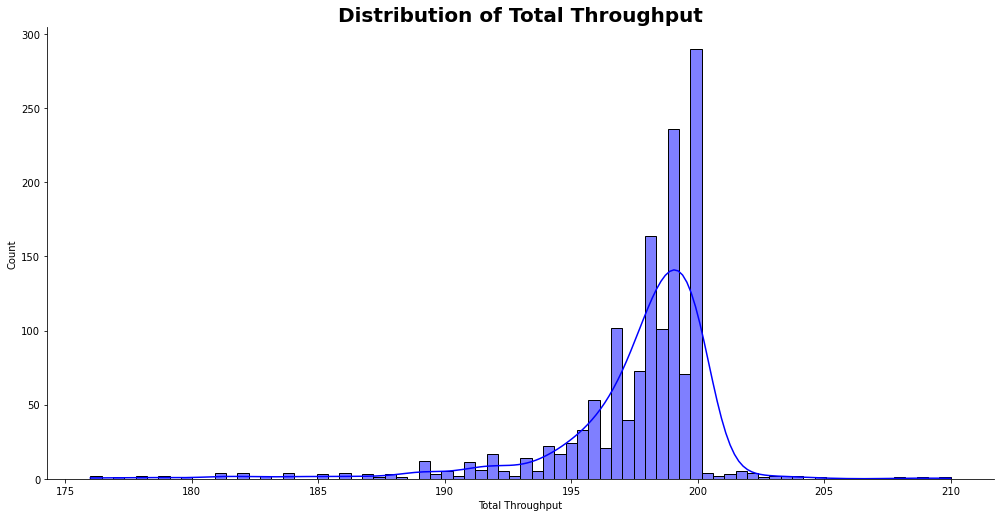

In [24]:
plot_hist(expHandset,'Total Throughput','blue')

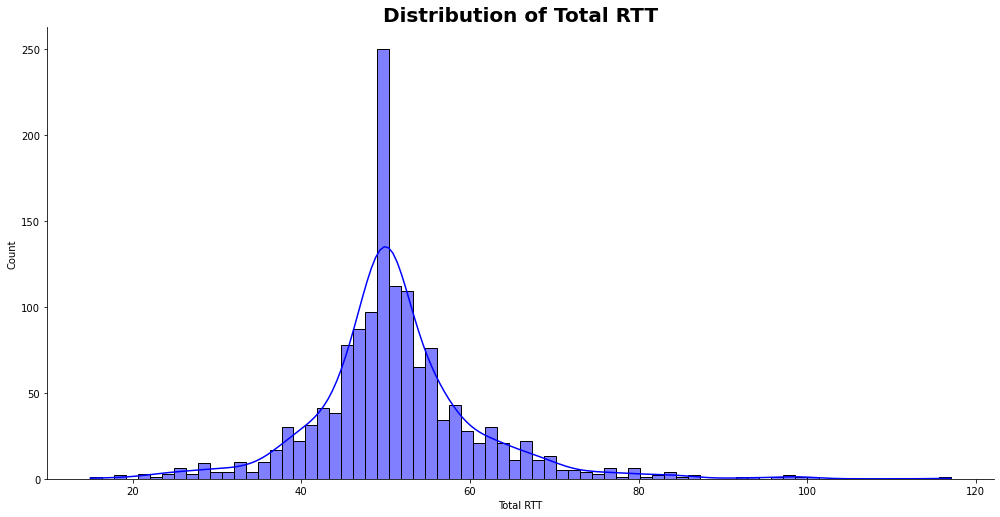

In [25]:
plot_hist(expHandset,'Total RTT','blue')

### KMEANS

In [26]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

In [27]:
dfExp.columns

Index(['Avg TCP', 'Avg RTT', 'Avg Throughput', 'Handset Type'], dtype='object')

We can only perform a K-means with continuous/numerical data. It will be non sense to include the type of the handset even if we encode it. To deal with those data we should use an other algorithms like K-mode.

In [28]:
dfKm = dfExp[['Avg TCP', 'Avg RTT', 'Avg Throughput']]
dfKmNorm = normalizer(dfKm,['Avg TCP', 'Avg RTT', 'Avg Throughput'])
km = KMeans(n_clusters=3)
km.fit(dfKmNorm)
# Predict the cluster
clust = km.predict(dfKmNorm)

dfKmFV = dfKm.copy()
dfKmFV['Cluster'] = clust
dfKmFV

,Avg TCP,Avg RTT,Avg Throughput,Cluster
MSISDN/Number,,,,
3197020876596.0,1179359.0,50.0,200.0,2
33601001722.0,1179359.0,46.0,200.0,2
33601001754.0,1179359.0,31.0,200.0,0
33601002511.0,1179359.0,50.0,200.0,2
33601007832.0,1179359.0,84.0,200.0,1
...,...,...,...,...
33789967113.0,1179359.0,53.0,200.0,2
33789980299.0,1179359.0,59.5,188.5,2
33789996170.0,1179359.0,52.0,198.0,2


In [29]:
# Function to create scatter plot
def plot_scatter(df,xcol:str,ycol:str,hue='Cluster'):
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=df,x=xcol,y=ycol,hue=hue)
        plt.title(f'{xcol} VS {ycol}', size=20, fontweight='bold')
        plt.show()

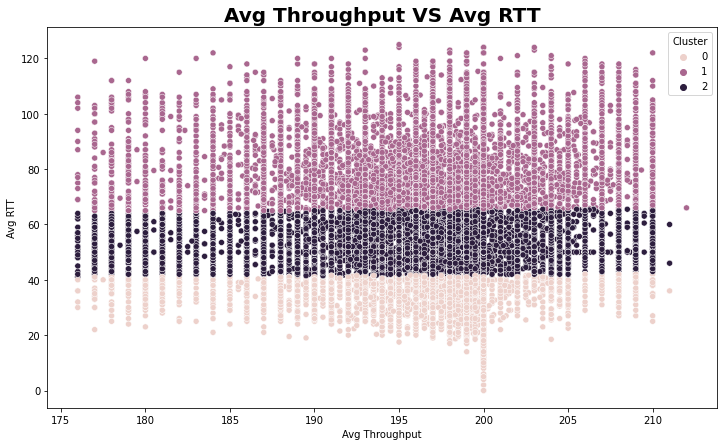

In [30]:
plot_scatter(dfKmFV,'Avg Throughput','Avg RTT')

In [31]:
dfKmFV.groupby('Cluster').describe().T

Cluster                          0             1             2
Avg TCP        count  3.083100e+04  1.502600e+04  6.099900e+04
               mean   1.179359e+06  1.179359e+06  1.179359e+06
               std    0.000000e+00  0.000000e+00  0.000000e+00
               min    1.179359e+06  1.179359e+06  1.179359e+06
               25%    1.179359e+06  1.179359e+06  1.179359e+06
               50%    1.179359e+06  1.179359e+06  1.179359e+06
               75%    1.179359e+06  1.179359e+06  1.179359e+06
               max    1.179359e+06  1.179359e+06  1.179359e+06
Avg RTT        count  3.083100e+04  1.502600e+04  6.099900e+04
               mean   3.217937e+01  7.931709e+01  5.138966e+01
               std    6.491046e+00  1.164738e+01  5.133750e+00
               min    0.000000e+00  6.500000e+01  4.100000e+01
               25%    2.800000e+01  7.000000e+01  4.900000e+01
               50%    3.200000e+01  7.600000e+01  5.000000e+01
               75%    3.800000e+01  8.600000e+01  5.400000e+01
               max    4.200000e+01  1.250000e+02  6.550000e+01
Avg Throughput count  3.083100e+04  1.502600e+04  6.099900e+04
               mean   1.991589e+02  1.974179e+02  1.985025e+02
               std    2.521325e+00  5.343836e+00  3.701360e+00
               min    1.760000e+02  1.760000e+02  1.760000e+02
               25%    1.995000e+02  1.955000e+02  1.980000e+02
               50%    2.000000e+02  1.990000e+02  2.000000e+02
               75%    2.000000e+02  2.000000e+02  2.000000e+02
               max    2.110000e+02  2.120000e+02  2.110000e+02

Based on the univariate analysis, only the AVG RTT helps to discriminate the users. This is due to the imputation method we use in the preprocessing. In fact, the variables related to the throughput and the TCP had too much missing values.